### Replication : Short Put Down & In ATM

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from configuration import ConfigurationBuilder
from pricing import BlackScholesMerton, GeometricBrownianMotion

In [2]:
configuration = ConfigurationBuilder(
    kind='put',
    spot=100.0,
    sigma=0.2,
    maturity=365,
    risk_free_rate=0,
    dividend_yield=0,
)

#### With Black Scholes Merton

In [3]:
shift = 1
barrier = 70

configuration.strike = barrier
option_1 = BlackScholesMerton(configuration)

configuration.strike = barrier -shift
option_2 = BlackScholesMerton(configuration)

In [4]:
quantity = (configuration.spot - barrier) / shift

In [5]:
pdi = (option_2 * quantity) - (option_1 * (quantity + 1))

In [6]:
print('price', abs(pdi.price()))
print('delta', pdi.delta())
print('gamma', pdi.gamma())
print('vega', pdi.vega())
print('theta', pdi.theta())
print('rho', pdi.rho())

price 1.5326268851455982
delta 0.16638636089748116
gamma -0.016485408717591188
vega -0.32970817435182354
theta 0.009033100667173256
rho 0.18171262974893732


#### With Geometric Brownian Motion

In [7]:
configuration.strike = configuration.spot
configuration.simulation = 10000
configuration.steps = 365
gbm_pricing = GeometricBrownianMotion(configuration)
gbm_pricing.run_simulation()

In [8]:
gbm_pricing.put_down_in(barrier=barrier)

1.6413662757236591

### Put Knock In can be activated at any time (not only at maturity)

In [9]:
gbm_pricing.put_knock_in(barrier=70)

2.526119859250134

### Sensitivity : Short Put Down & In

In [10]:
init_spot = 100

data = []

for maturity, sigma in ((365, 0.2), (365, 0.05), (120, 0.20)):
    for spot in range(10, 190):
        
        # Configuration ---------------------------
        
        configuration.maturity = maturity
        configuration.sigma = sigma
        configuration.spot = spot

        # Option Strip ----------------------------

        configuration.strike = barrier
        option_1 = BlackScholesMerton(configuration)

        configuration.strike = barrier -shift
        option_2 = BlackScholesMerton(configuration)

        pdi = (option_1 * -(quantity + 1)) + (option_2 * quantity)

        # Retrieve Result ---------------------------

        data.append({"spot": spot,
                     "maturity": maturity,
                     "sigma": sigma,
                     "price": abs(pdi.price()),
                     "delta": pdi.delta(),
                     "gamma": pdi.gamma(),
                     "vega": pdi.vega(),
                     "theta": pdi.theta(),
                     "rho": pdi.rho()})

# Reshape data ----------------------------------------

data = pd.DataFrame(data)
reference = data[(data["maturity"]==365) & (data["sigma"]==0.2)].set_index("spot")
short_sigma = data[(data["maturity"]==365) & (data["sigma"]==0.05)].set_index("spot")
short_maturity = data[(data["maturity"]==120) & (data["sigma"]==0.20)].set_index("spot")

In [11]:
price = pd.DataFrame()
price["sigma  20 maturity  365"] = reference["price"]
price["sigma  5 maturity  365"] = short_sigma["price"]
price["sigma  20 maturity  120"] = short_maturity["price"]

delta = pd.DataFrame()
delta["sigma  20 maturity  365"] = reference["delta"]
delta["sigma  5 maturity  365"] = short_sigma["delta"]
delta["sigma  20 maturity  120"] = short_maturity["delta"]

gamma = pd.DataFrame()
gamma["sigma  20 maturity  365"] = reference["gamma"]
gamma["sigma  5 maturity  365"] = short_sigma["gamma"]
gamma["sigma  20 maturity  120"] = short_maturity["gamma"]

vega = pd.DataFrame()
vega["sigma  20 maturity  365"] = reference["vega"]
vega["sigma  5 maturity  365"] = short_sigma["vega"]
vega["sigma  20 maturity  120"] = short_maturity["vega"]

theta = pd.DataFrame()
theta["sigma  20 maturity  365"] = reference["theta"]
theta["sigma  5 maturity  365"] = short_sigma["theta"]
theta["sigma  20 maturity  120"] = short_maturity["theta"]

rho = pd.DataFrame()
rho["sigma  20 maturity  365"] = reference["rho"]
rho["sigma  5 maturity  365"] = short_sigma["rho"]
rho["sigma  20 maturity  120"] = short_maturity["rho"]

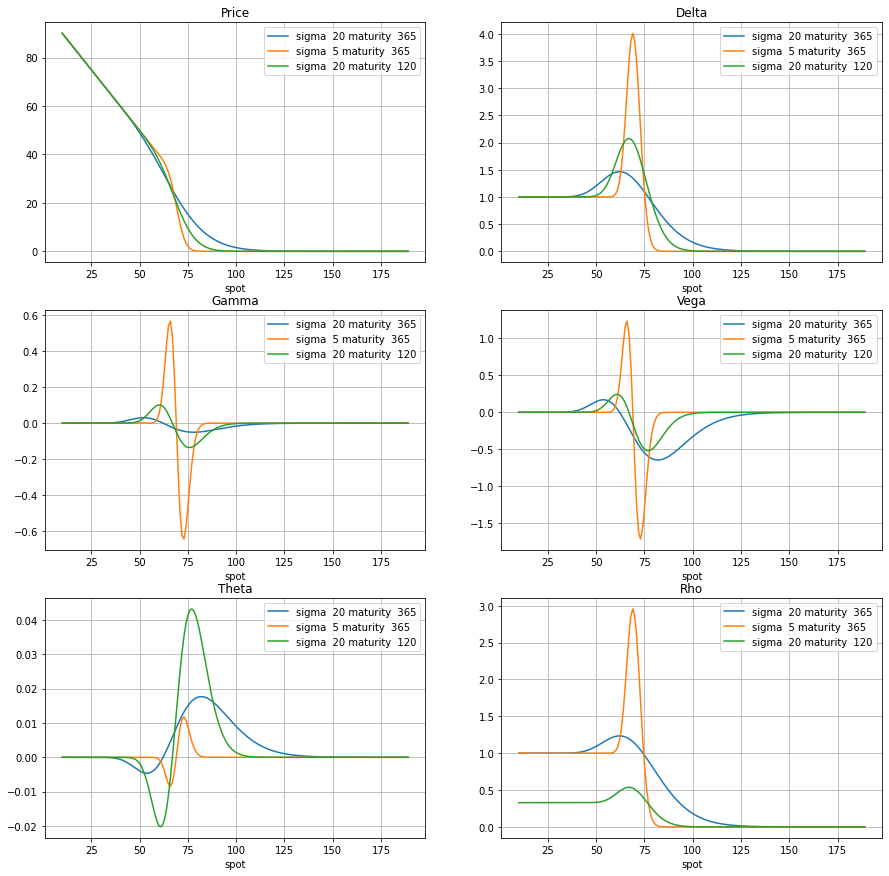

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=2)

price.plot(ax=axes[0, 0], title='Price', grid=True, legend=True)

delta.plot(ax=axes[0, 1], title='Delta', grid=True, legend=True)

gamma.plot(ax=axes[1, 0], title='Gamma', grid=True, legend=True)

vega.plot(ax=axes[1, 1], title='Vega', grid=True, legend=True)

theta.plot(ax=axes[2, 0], title='Theta', grid=True, legend=True)

rho.plot(ax=axes[2, 1], title='Rho', grid=True, legend=True)

fig.set_figheight(15)
fig.set_figwidth(15);